# Case study - GFP - introducing the pump dump probe


Recently, it has been demonstrated that coherent vibrational modes promote the ultrafast internal conversion and intersystem crossing in thiobases. The global and target analysis of 4-thiothymidine (GFPppH2O) in Phosphate-Buffered Saline (PBS) has been described in
Teles-Ferreira DC, van Stokkum IHM, Conti I, Ganzer L, Manzoni C, Garavelli M, Cerullo G, Nenov A, Borrego-Varillas R, de Paula AM (2022) Coherent vibrational modes promote the ultrafast internal conversion and intersystem crossing in thiobases. Physical Chemistry Chemical Physics 24 (36):21750-21758. doi:10.1039/D2CP02073D

![figureGFP](./GFP.png)

The photocycle of GFP


## Define and inspect data


(<Figure size 1500x1000 with 5 Axes>,
 (<Axes: xlabel='time', ylabel='spectral'>,
  <Axes: title={'center': 'data. LSV'}, xlabel='time', ylabel='data_left_singular_vectors'>,
  <Axes: title={'center': 'data. log(SV)'}, xlabel='singular_value_index', ylabel='data_singular_values'>,
  <Axes: title={'center': 'data. RSV'}, xlabel='spectral', ylabel='data_right_singular_vectors'>))

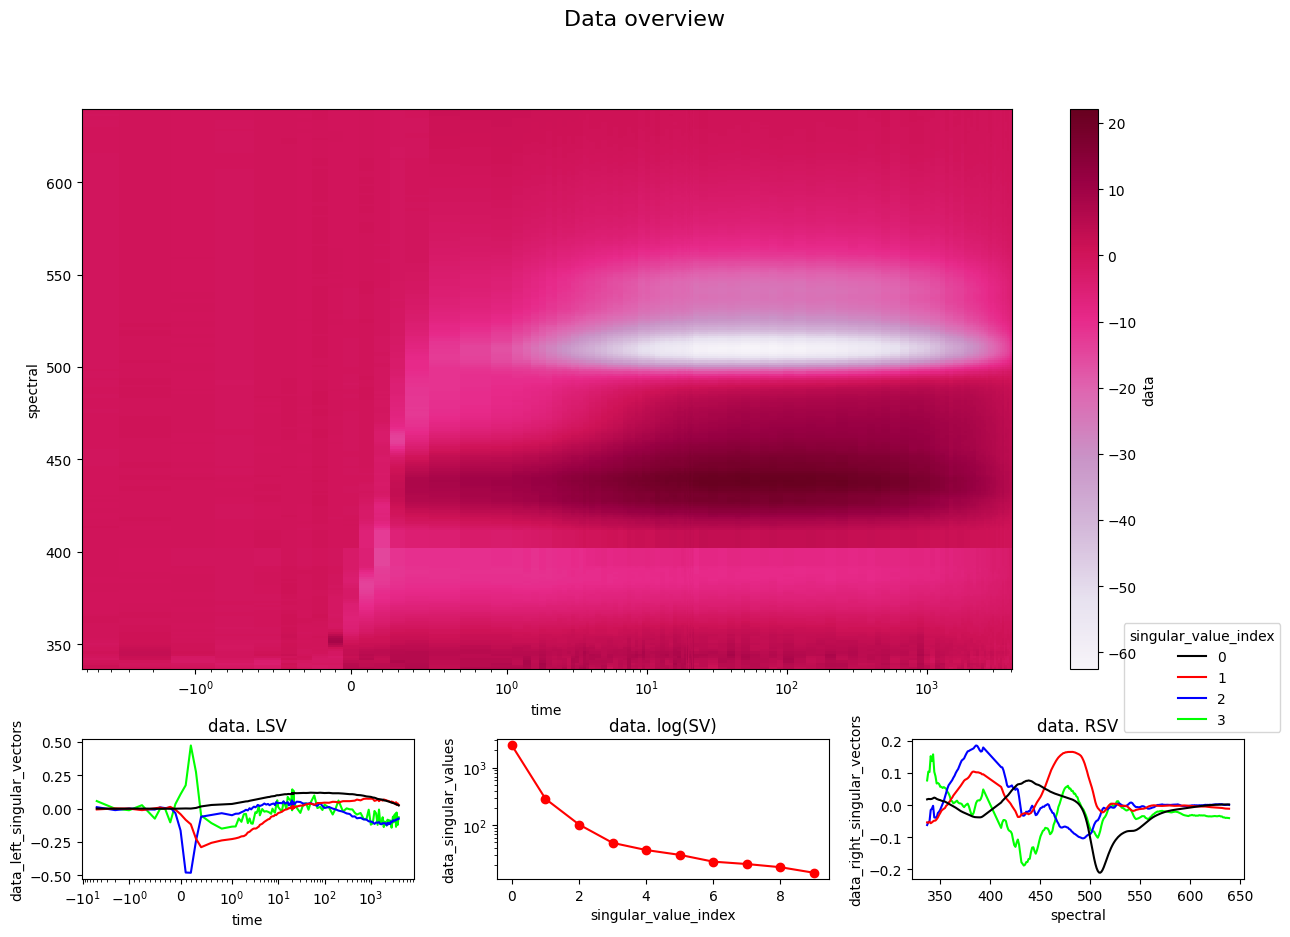

In [11]:
from pyglotaran_extras import plot_data_overview

experiment_data = {
    "GFPppH2O": "data/gfph2oa.ascii",
}

plot_data_overview(experiment_data["GFPppH2O"], linlog=True, linthresh=1)


## Model and parameter definitions


In [12]:
from glotaran.utils.ipython import display_file

model_path = "models/model_sequential.yml"
# display_file(model_path, syntax="yaml")


In [13]:
parameters_file_path = "models/parameters_sequential.yml"
# display_file(parameters_file_path, syntax="yaml")


# Optimization


In [14]:
from glotaran.optimization.optimize import optimize
from glotaran.project.scheme import Scheme

scheme = Scheme(
    model_path,
    parameters_file_path,
    experiment_data,
    maximum_number_function_evaluations=11,
)
result = optimize(scheme)


C:\Users\jsnel\src\pyglotaran-main\pyglotaran\glotaran\optimization\data_provider.py:615: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  ["".join(sub_arr.values) for _, sub_arr in aligned_groups.groupby("global")]


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.6064e+03                                    2.43e+04    
       1              2         5.8364e+03      2.77e+03       9.34e-01       1.23e+04    
       2              3         5.0922e+03      7.44e+02       1.96e-01       3.57e+03    
       3              4         4.4411e+03      6.51e+02       4.80e-01       3.73e+03    
       4              5         3.7622e+03      6.79e+02       4.79e-01       9.64e+03    
       5              6         3.2281e+03      5.34e+02       2.83e-01       6.17e+03    
       6              7         3.1517e+03      7.63e+01       1.25e-01       1.41e+03    
       7              8         3.1455e+03      6.24e+00       5.43e-02       4.53e+02    
       8              9         3.1445e+03      1.04e+00       2.39e-02       1.89e+02    
       9             10         3.1442e+03      2.09e-01       9.72e-03       9.22e+01    

- 8.5028e+02
- 8.4975e+02
-  14             17         7.9961e+02      6.35e-01  (free hot T1 rate)
-  16             17         7.9877e+02      2.69e-01 (fixed hot T1 rate)


## Inspect fit quality


In [15]:
result


| Optimization Result                       |          |
|-------------------------------------------|----------|
| Number of residual evaluation             | 11       |
| Number of residuals                       | 32160    |
| Number of free parameters                 | 6        |
| Number of conditionally linear parameters | 1200     |
| Degrees of freedom                        | 30954    |
| Chi Square                                | 6.29e+03 |
| Reduced Chi Square                        | 2.03e-01 |
| Root Mean Square Error (RMSE)             | 4.51e-01 |

<br><details>

### Model

#### Dataset Groups

- **default**
  - _Label_: default
  - _Residual Function_: variable_projection


#### K Matrix

- **k1**
  - _Label_: k1
  - _Matrix_: {('S1', 'S2'): 'kinetic.to_S1_from_S2(3.53e-01±3.50e-03, t-value: 101, initial: 4.00e-01)', ('T1hot', 'S1'): 'kinetic.to_T1hot_from_S1(7.74e-02±8.22e-04, t-value: 94, initial: 8.00e-02)', ('T1', 'T1hot'): 'kinetic.to_T1_from_T1hot(3.35e-04, fixed)', ('T1', 'T1'): 'kinetic.from_T1(2.53e-03, fixed)'}


#### Megacomplex

- **decay**
  - _Label_: decay
  - _Dimension_: time
  - _Type_: decay
  - _K Matrix_: ['k1']

- **artifact**
  - _Label_: artifact
  - _Dimension_: time
  - _Type_: coherent-artifact
  - _Order_: 1


#### Initial Concentration

- **j1**
  - _Label_: j1
  - _Compartments_: ['S2', 'S1', 'T1', 'T1hot']
  - _Parameters_: ['j.1(1.00e+00, fixed)', 'j.0(0.00e+00, fixed)', 'j.0(0.00e+00, fixed)', 'j.0(0.00e+00, fixed)']
  - _Exclude From Normalize_: []


#### Irf

- **irf1**
  - _Label_: irf1
  - _Normalize_: True
  - _Backsweep_: False
  - _Dispersion Center_: irf.dispcenter(5.00e+02, fixed)
  - _Center Dispersion Coefficients_: ['irf.disp1(-3.05e-01±9.82e-03, t-value: -31, initial: -3.27e-01)', 'irf.disp2(-2.14e-01±9.80e-03, t-value: -22, initial: -1.92e-01)']
  - _Width Dispersion Coefficients_: []
  - _Model Dispersion With Wavenumber_: True
  - _Type_: spectral-gaussian
  - _Center_: irf.center(3.53e-01±2.07e-03, t-value: 170, initial: 3.60e-02)
  - _Width_: irf.width(6.62e-02±5.28e-04, t-value: 125, initial: 8.33e-02)


#### Dataset

- **GFPppH2O**
  - _Label_: GFPppH2O
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['decay', 'artifact']
  - _Initial Concentration_: j1
  - _Irf_: irf1



</section></section></details><section><section>

In [16]:
result.optimized_parameters


  * __irf__:

    | _Label_    |    _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |------------|------------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | center     |  3.528e-01 |          2.073e-03 |  170        |        -inf |         inf | True     | False            | `None`         |
    | width      |  6.624e-02 |          5.281e-04 |  125        |        -inf |         inf | True     | True             | `None`         |
    | dispcenter |  5.000e+02 |        nan         |  nan        |        -inf |         inf | False    | False            | `None`         |
    | disp1      | -3.052e-01 |          9.817e-03 |  -31        |        -inf |         inf | True     | False            | `None`         |
    | disp2      | -2.142e-01 |          9.796e-03 |  -22        |        -inf |         inf | True     | False            | `None`         |

  * __j__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |
    |         0 | 0.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __kinetic__:

    | _Label_          |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |------------------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | to_S1_from_S2    | 3.531e-01 |          3.500e-03 |  101        |        -inf |         inf | True     | True             | `None`         |
    | to_T1hot_from_S1 | 7.742e-02 |          8.216e-04 |  94         |        -inf |         inf | True     | True             | `None`         |
    | to_T1_from_T1hot | 3.350e-04 |        nan         |  nan        |        -inf |         inf | False    | True             | `None`         |
    | from_T1          | 2.529e-03 |        nan         |  nan        |        -inf |         inf | False    | True             | `None`         |



In [17]:
result.data["GFPppH2O"].lifetime_decay


<xarray.DataArray 'lifetime_decay' (component_decay: 4)> Size: 32B
array([2.83241075e+00, 1.29157934e+01, 2.98507463e+03, 3.95448568e+02])
Coordinates:
  * component_decay  (component_decay) int32 16B 1 2 3 4
    rate_decay       (component_decay) float64 32B 0.3531 0.07742 ... 0.002529
    lifetime_decay   (component_decay) float64 32B 2.832 12.92 2.985e+03 395.4

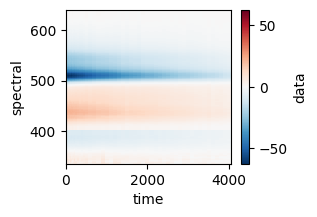

In [18]:
result.data["GFPppH2O"].data.plot(x="time",y="spectral",size=2)

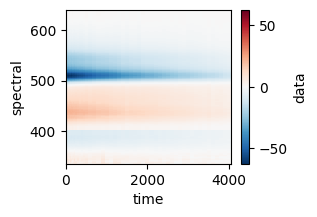

In [19]:
# fig, axes = result.data["GFPppH2O"].data.plot(x="time",y="spectral",size=2)
result.data["GFPppH2O"].data.plot(x="time",y="spectral",size=2)
# axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)

In [20]:
from glotaran.io import save_dataset, save_result
save_result(
        result=result,
        result_path="20230212/result.yaml",
        allow_overwrite=True,
    )

['20230212/result.md',
 '20230212/initial_parameters.csv',
 '20230212/optimized_parameters.csv',
 '20230212/parameter_history.csv',
 '20230212/optimization_history.csv',
 '20230212/GFPppH2O.nc',
 '20230212/model.yml',
 '20230212/scheme.yml',
 '20230212/result.yaml']

Text(-0.1, 1, 'B')

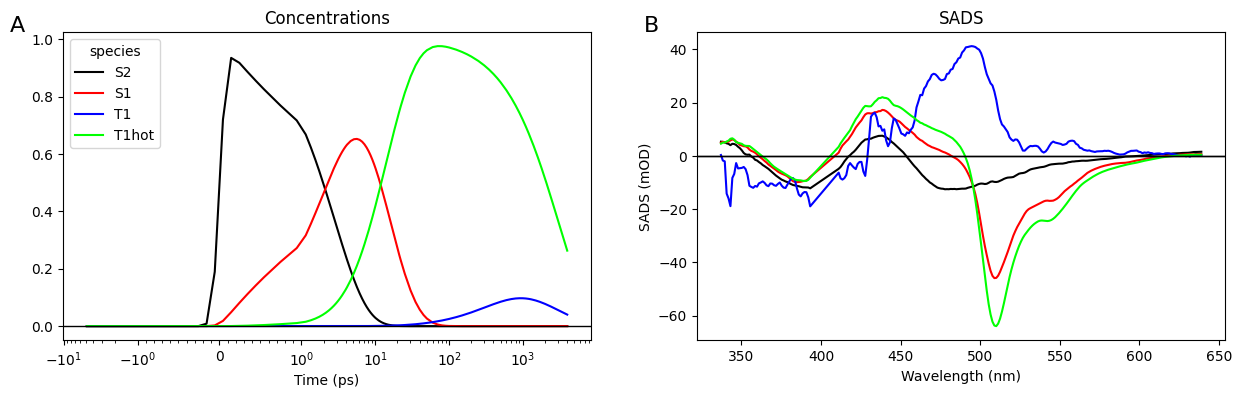

In [21]:
from pyglotaran_extras.plotting.plot_concentrations import plot_concentrations
from pyglotaran_extras.plotting.plot_spectra import plot_sas
import matplotlib.pyplot as plt


def plot_concentration_and_spectra(result_dataset):
    # fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    plot_concentrations(result_dataset,axes[0], center_λ=0, linlog=True)
    plot_sas(result_dataset,axes[1])
    return fig, axes

fig, axes = plot_concentration_and_spectra(result.data["GFPppH2O"])
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("SADS (mOD)")
axes[1].set_title("SADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)


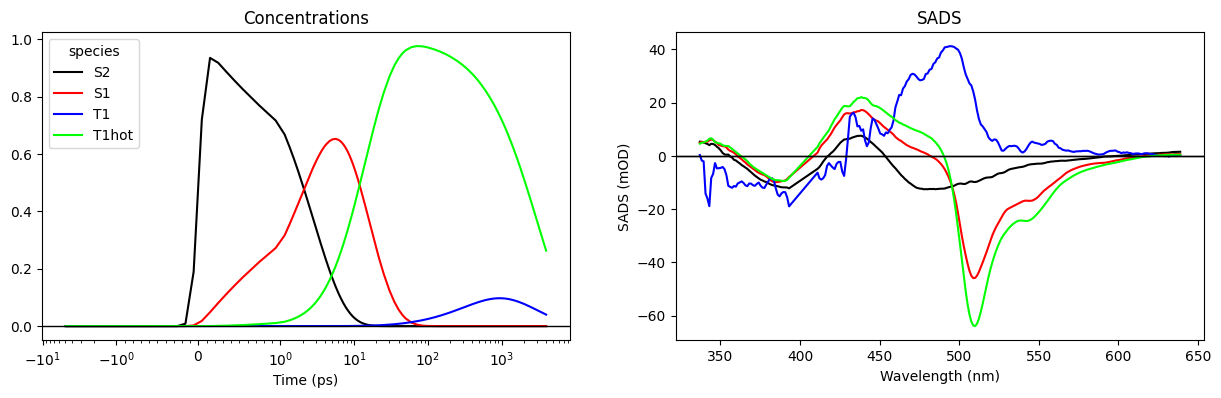

In [22]:
from pyglotaran_extras.plotting.plot_concentrations import plot_concentrations
from pyglotaran_extras.plotting.plot_spectra import plot_sas
import matplotlib.pyplot as plt


def plot_concentration_and_spectra(result_dataset):
    # fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    plot_concentrations(result_dataset,axes[0], center_λ=0, linlog=True)
    plot_sas(result_dataset,axes[1])
    return fig, axes

fig, axes = plot_concentration_and_spectra(result.data["GFPppH2O"])
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("SADS (mOD)")
axes[1].set_title("SADS")
axes[1].axhline(0, color="k", linewidth=1)

## Plot fitted traces


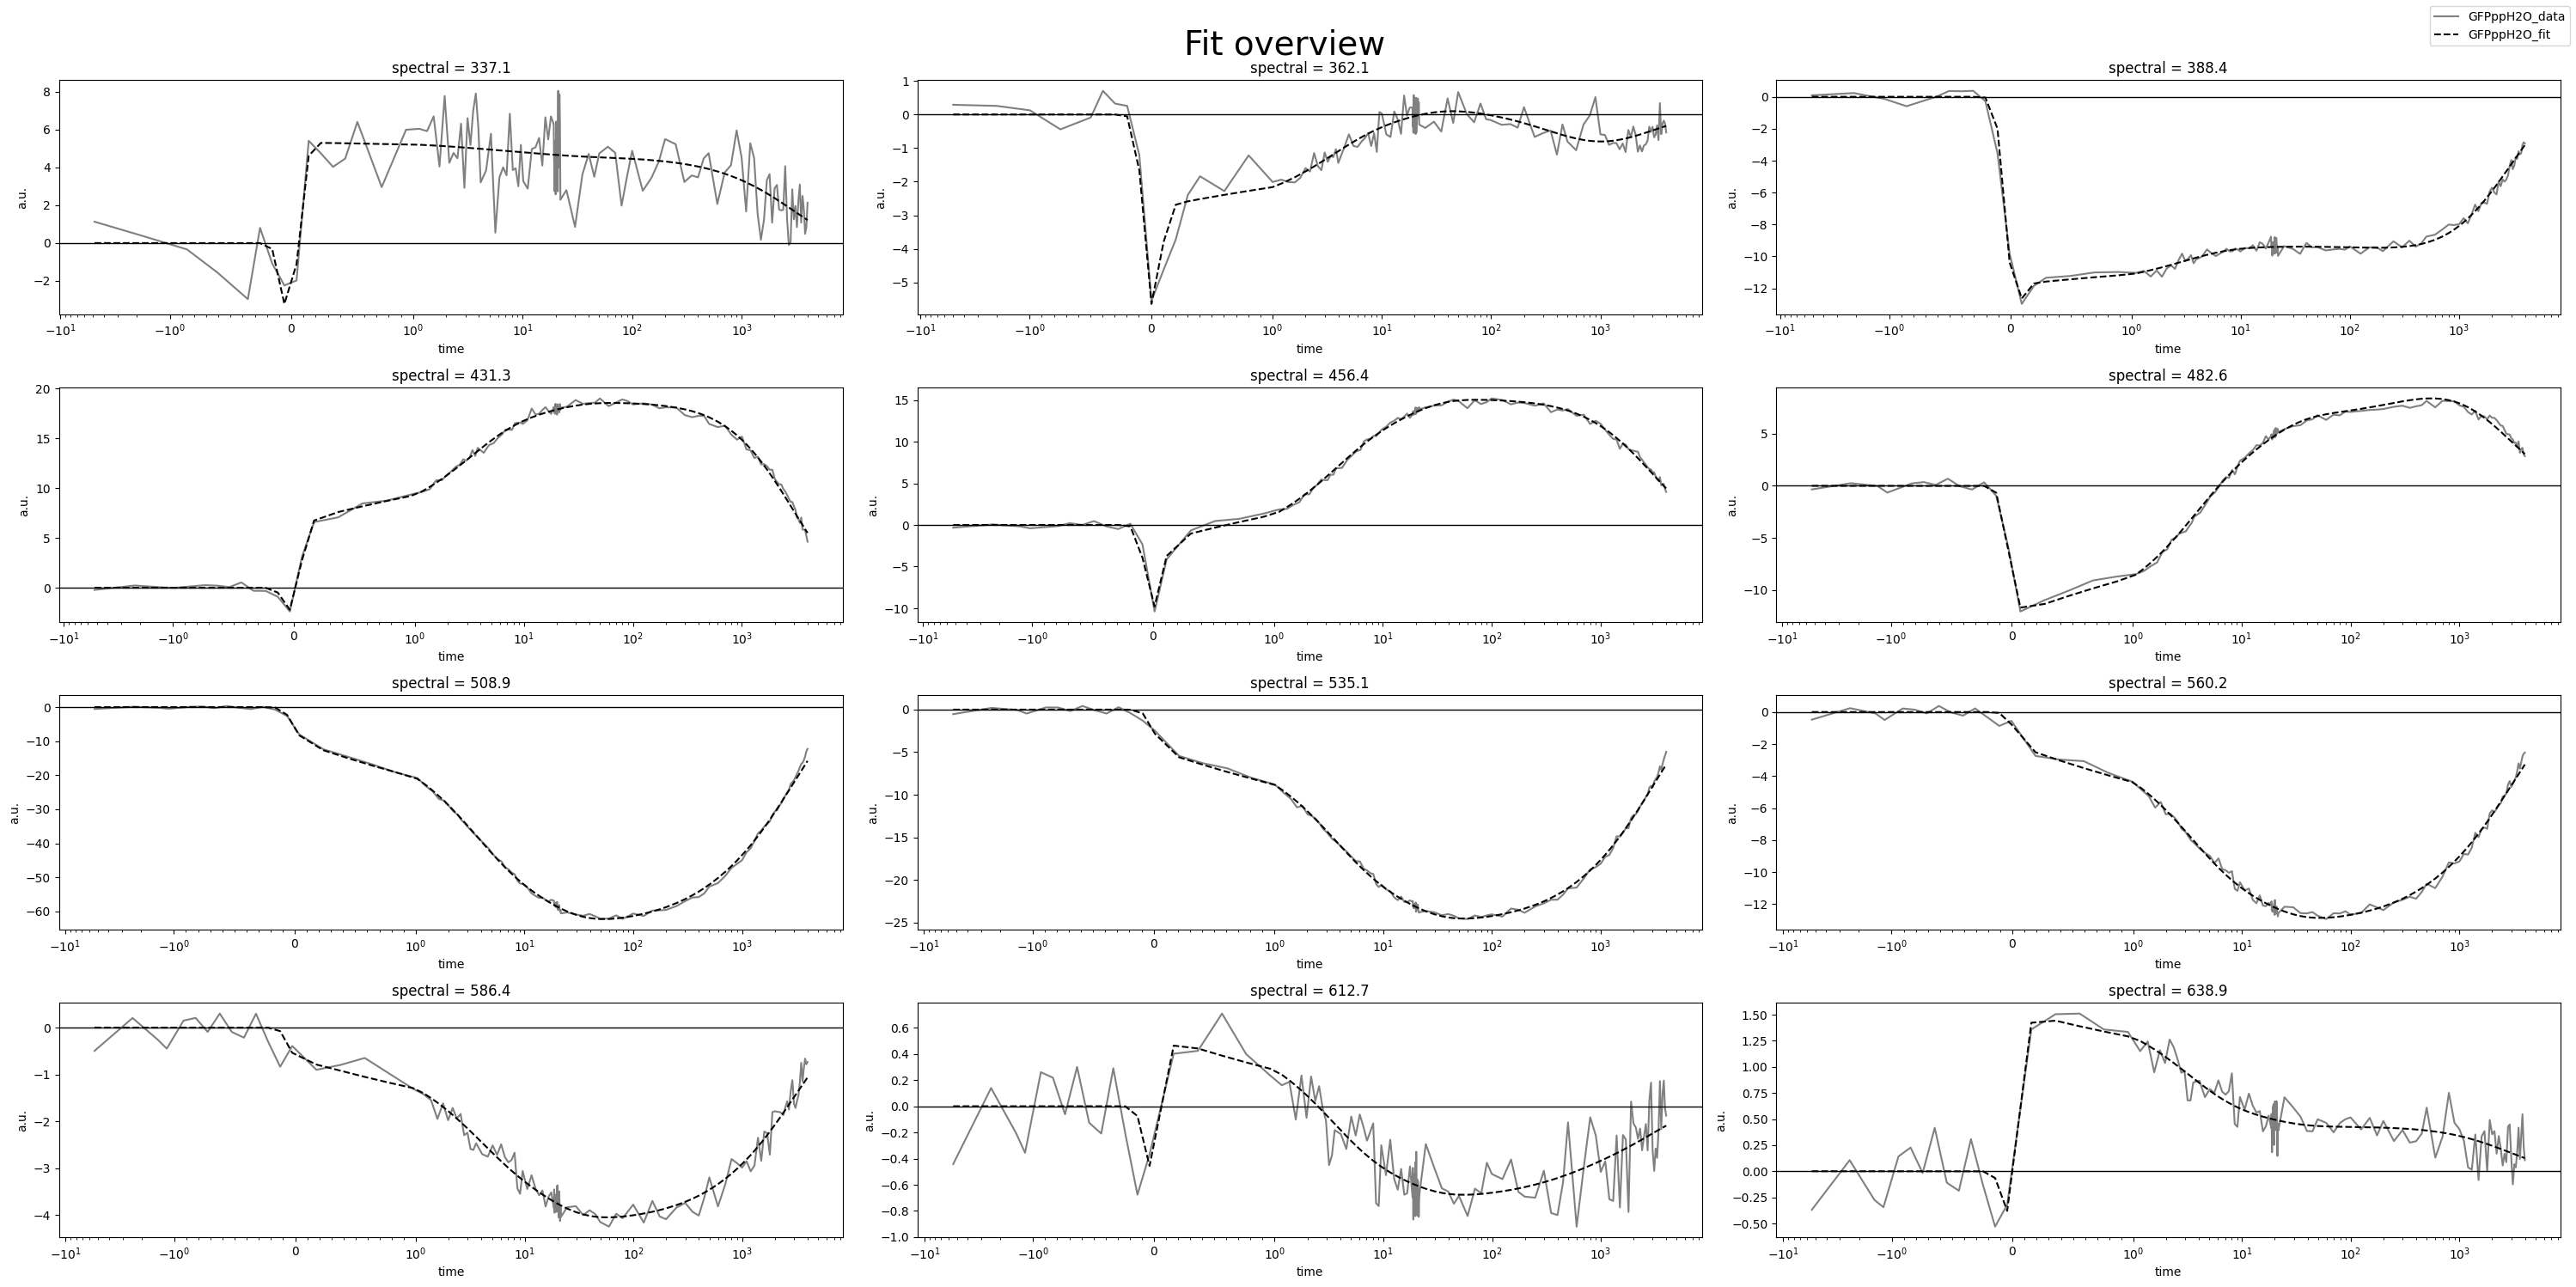

In [23]:
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from pyglotaran_extras.plotting.style import PlotStyle

wavelengths = select_plot_wavelengths(
    result.data["GFPppH2O"], equidistant_wavelengths=False, axes_shape=(4, 3)
)
fig3tr, axes = plot_fitted_traces(
    result,
    wavelengths,
    axes_shape=(4, 3),
    linlog=True,
    linthresh=1,
    cycler=PlotStyle().data_cycler_solid_dashed,
)

### Compare fit to original paper


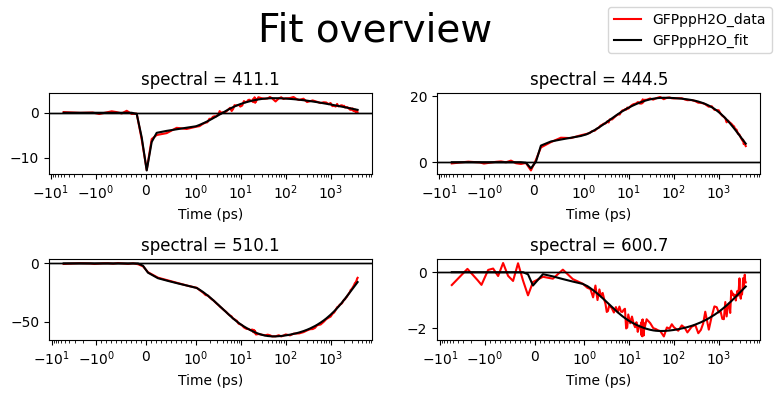

In [24]:
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from cycler import cycler

wavelengths = [406, 445, 510, 601]
fig3tr, axes = plot_fitted_traces(
    result,
    wavelengths,
    axes_shape=(2, 2),
    linlog=True,
    linthresh=1,
    cycler=cycler(color=["r", "k"]), # change plot colors
    # figsize=(10, 5),
    figsize=(8, 4),
)

# Add thin line at zero to all plots
for ax in axes.flatten():
    ax.axhline(0, color="k", linewidth=1)
    ax.set_xlabel("Time (ps)")
    ax.set_ylabel("")

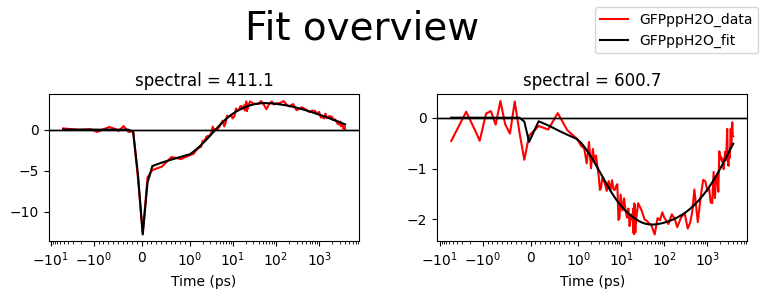

In [25]:
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from cycler import cycler

wavelengths = [406, 601]
fig3tr, axes = plot_fitted_traces(
    result,
    wavelengths,
    axes_shape=(1, 2),
    linlog=True,
    linthresh=1,
    cycler=cycler(color=["r", "k"]), # change plot colors
    # figsize=(10, 5),
    figsize=(8, 3),
)

# Add thin line at zero to all plots
for ax in axes.flatten():
    ax.axhline(0, color="k", linewidth=1)
    ax.set_xlabel("Time (ps)")
    ax.set_ylabel("")

## Overview


C:\Users\jsnel\src\pyglotaran-main\pyglotaran-extras\pyglotaran_extras\plotting\utils.py:150: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  center_λ = min(res.dims["spectral"], round(res.dims["spectral"] / 2))
C:\Users\jsnel\src\pyglotaran-main\pyglotaran-extras\pyglotaran_extras\plotting\plot_overview.py:135: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  center_λ = min(res.dims["spectral"], round(res.dims["spectral"] / 2))
C:\Users\jsnel\AppData\Local\Temp\ipykernel_47036\2488251874.py:3: PyglotaranExtrasApiDeprecationWarning: The ``figure_only`` argument was deprecated please remove it f

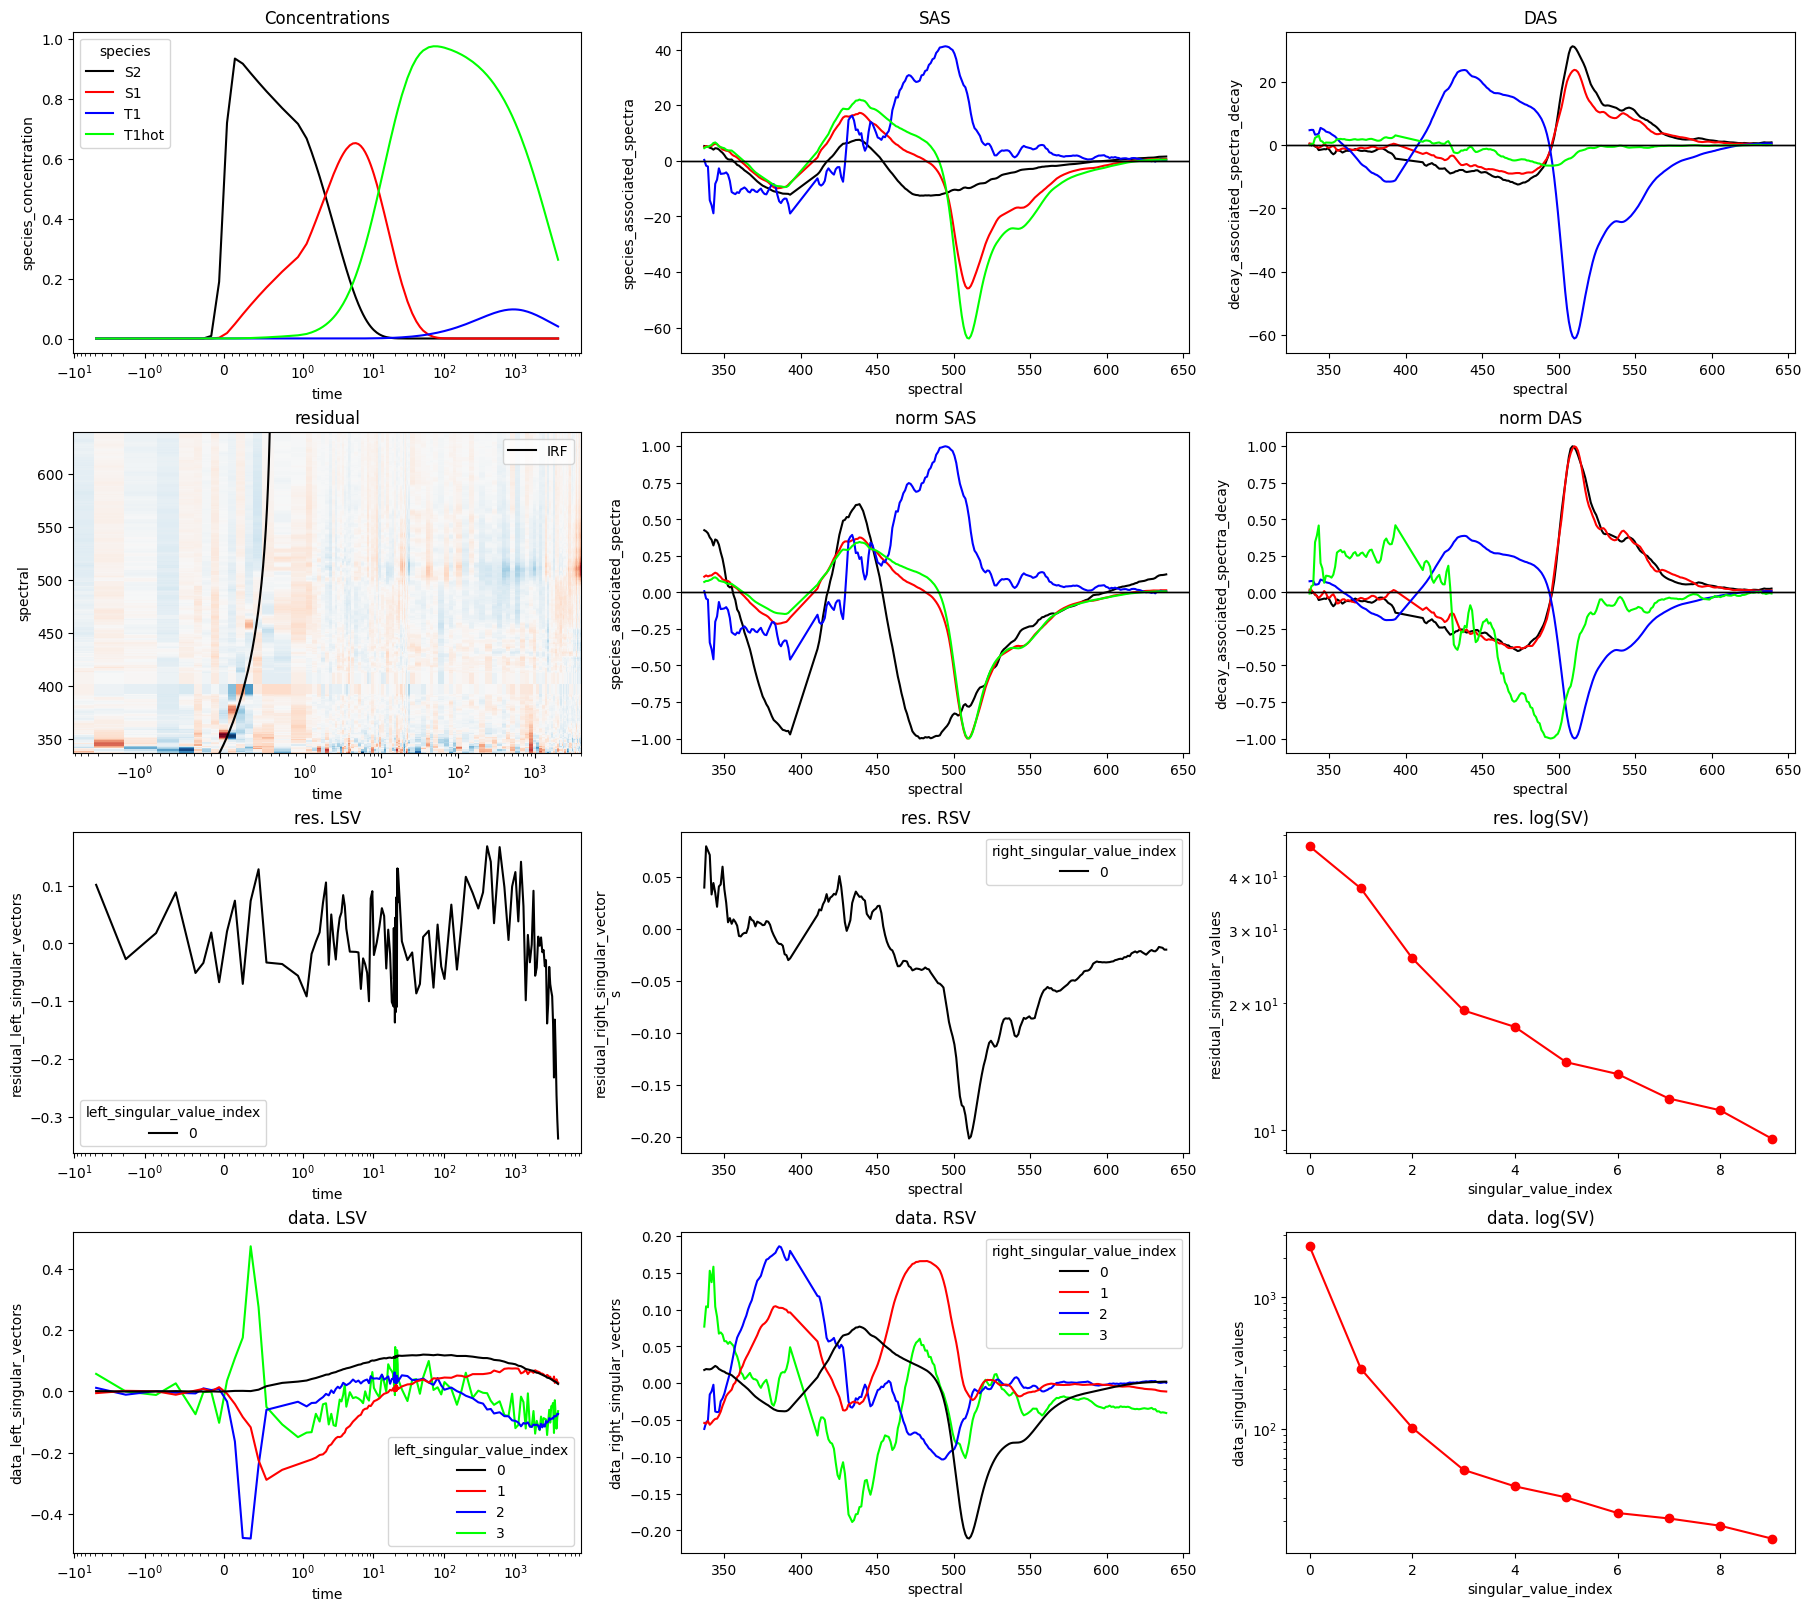

In [26]:
from pyglotaran_extras import plot_overview

fig, axes = plot_overview(result, linlog=True, linthresh=1, figure_only=False,nr_of_residual_svd_vectors=1)

# Add thin line at zero to SAS and DAS plots
for ax in axes[0:2, 1:3].flatten():
    ax.axhline(0, color="k", linewidth=1)


Text(0, 0.5, '')

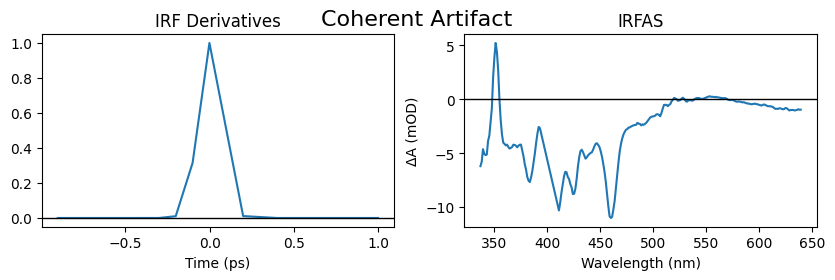

In [27]:
from pyglotaran_extras import plot_coherent_artifact

irfas_plot_wavelength = 550

fig, axes = plot_coherent_artifact(
    result.data["GFPppH2O"], time_range=(-1, 1), spectral=irfas_plot_wavelength,figsize=(10, 2.5)
)
axes[0].set_xlabel("Time (ps)")
axes[0].get_legend().remove()
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")

Text(0.01, 0.9, 'B')

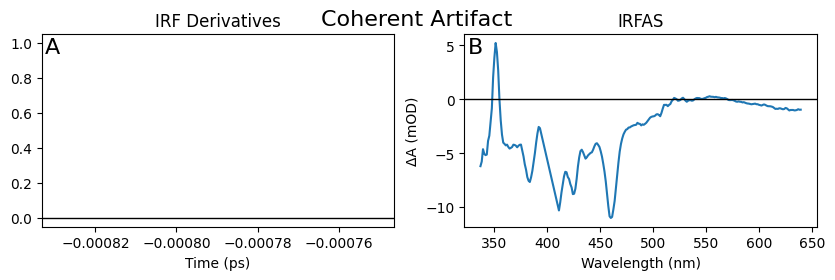

In [28]:
from pyglotaran_extras import plot_coherent_artifact

irfas_plot_wavelength = 550

fig, axes = plot_coherent_artifact(
    result.data["GFPppH2O"], time_range=(-0.1, 0.1), spectral=irfas_plot_wavelength,figsize=(10, 2.5)
)
axes[0].set_xlabel("Time (ps)")
axes[0].get_legend().remove()
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")
axes[0].annotate("A", xy=(0.01, 0.9), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(0.01, 0.9), xycoords="axes fraction",fontsize=16)

Text(-0.1, 1, 'A')

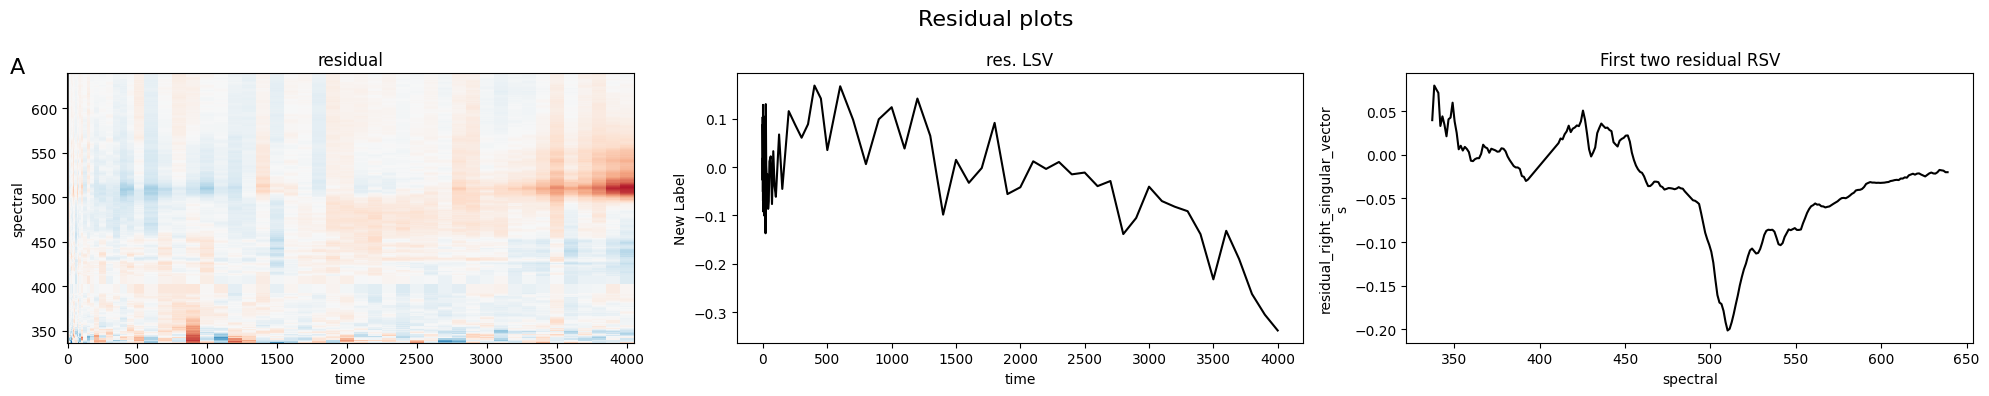

In [29]:
from pyglotaran_extras.plotting.plot_residual import plot_residual
from pyglotaran_extras.plotting.plot_svd import plot_lsv_residual,plot_rsv_residual

def plot_residual_and_svd(result_dataset):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    plot_residual(result_dataset,axes[0])
    plot_lsv_residual(result_dataset,axes[1],indices=[0])
    plot_rsv_residual(result_dataset,axes[2],indices=[0])

    return fig, axes

fig, axes = plot_residual_and_svd(result.data["GFPppH2O"])

# Remove legend
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].get_legend().remove()

# Change y-label (use `""` to remove the label)
axes[1].set_ylabel("New Label")


# Change sub plot title
axes[2].set_title("First two residual RSV")

# Add figure title
fig.suptitle("Residual plots", fontsize=16)

# Better spacing
fig.tight_layout()

# Add subplot label
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)

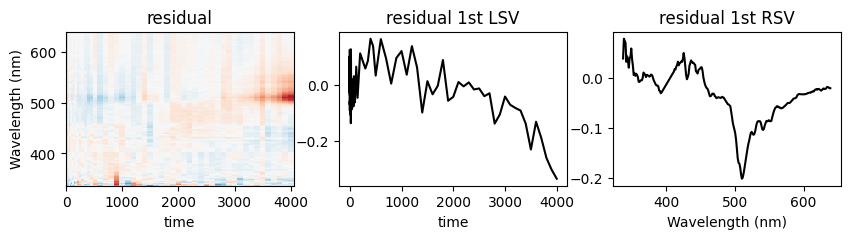

In [30]:
from pyglotaran_extras.plotting.plot_residual import plot_residual
from pyglotaran_extras.plotting.plot_svd import plot_lsv_residual,plot_rsv_residual

def plot_residual_and_svd(result_dataset):
    fig, axes = plt.subplots(1, 3, figsize=(10, 2))
    plot_residual(result_dataset,axes[0])
    axes[0].get_legend().remove()
    axes[0].set_ylabel("Wavelength (nm)")
    plot_lsv_residual(result_dataset,axes[1], indices=[0])
    axes[1].get_legend().remove()
    axes[1].set_ylabel("")
    axes[1].set_title("residual 1st LSV")
    plot_rsv_residual(result_dataset,axes[2], indices=[0])
    axes[2].set_xlabel("Wavelength (nm)")
    axes[2].set_title("residual 1st RSV")
    axes[2].get_legend().remove()
    axes[2].set_ylabel("")

    return fig, axes

fig, axes = plot_residual_and_svd(result.data["GFPppH2O"])

Text(-0.1, 1, 'C')

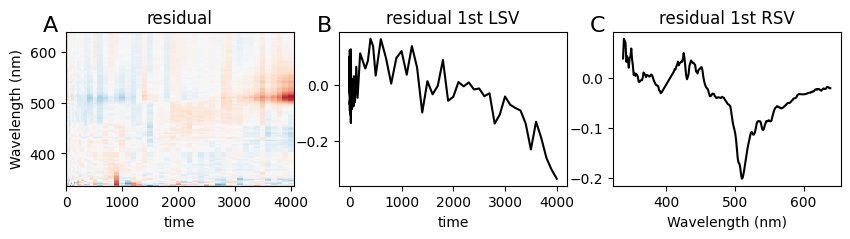

In [31]:
from pyglotaran_extras.plotting.plot_residual import plot_residual
from pyglotaran_extras.plotting.plot_svd import plot_lsv_residual,plot_rsv_residual

def plot_residual_and_svd(result_dataset):
    fig, axes = plt.subplots(1, 3, figsize=(10, 2))
    plot_residual(result_dataset,axes[0])
    axes[0].get_legend().remove()
    axes[0].set_ylabel("Wavelength (nm)")
    plot_lsv_residual(result_dataset,axes[1], indices=[0])
    axes[1].get_legend().remove()
    axes[1].set_ylabel("")
    axes[1].set_title("residual 1st LSV")
    plot_rsv_residual(result_dataset,axes[2], indices=[0])
    axes[2].set_xlabel("Wavelength (nm)")
    axes[2].set_title("residual 1st RSV")
    axes[2].get_legend().remove()
    axes[2].set_ylabel("")

    return fig, axes

fig, axes = plot_residual_and_svd(result.data["GFPppH2O"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)

## Refinement by estimation of the laser intensity fluctuations responsible for the residual structure

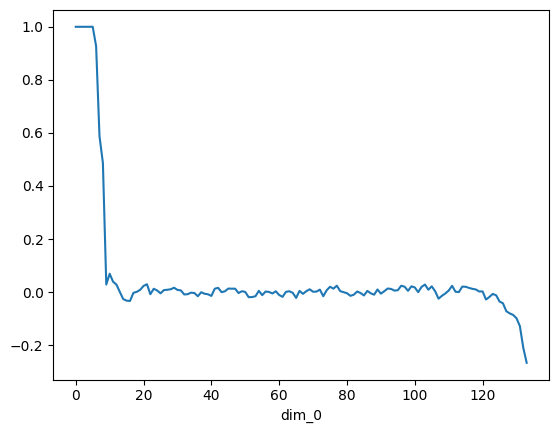

In [32]:
import numpy as np
import xarray as xr

alfa=[]
for timepoint in result.data["GFPppH2O"].time:
    # print(timepoint.item())
    y=result.data["GFPppH2O"].residual.sel(time=timepoint)
    x=result.data["GFPppH2O"].data.sel(time=timepoint)
    # print(x)
    alfa.append(np.dot(y,x)/np.dot(x,x))
    # break
# result.data["GFPppH2O"].residual;result.data["GFPppH2O"].data;result.data["GFPppH2O"].fitted_data
xr.DataArray(alfa).plot()


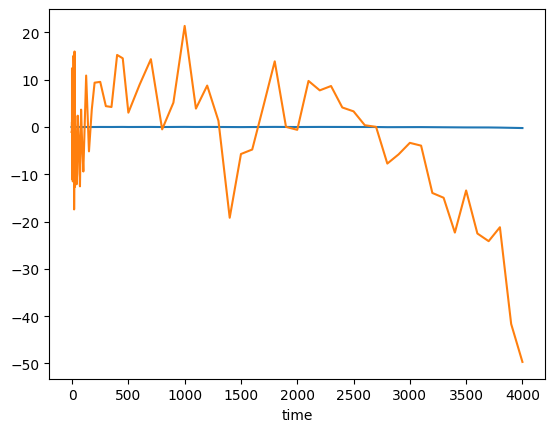

In [33]:
import numpy as np
import xarray as xr

alfa=[]
talfa=[]
for timepoint in result.data["GFPppH2O"].time:
    # print(timepoint.item())
    y=result.data["GFPppH2O"].residual.sel(time=timepoint)
    x=result.data["GFPppH2O"].fitted_data.sel(time=timepoint)
    xtx=np.dot(x,x)
    xty=np.dot(x,y)
    a=xty/xtx
    res=y-a*x
    df=len(y)-1
    var=np.dot(res,res)/df
    ta=a/np.sqrt(var/xtx)
    # print(x)
    alfa.append(a)
    talfa.append(ta)
    # break
# result.data["GFPppH2O"].residual;result.data["GFPppH2O"].data;result.data["GFPppH2O"].fitted_data
talfa_xr=xr.DataArray(talfa,coords={"time":result.data["GFPppH2O"].time})
alfa_xr=xr.DataArray(alfa,coords={"time":result.data["GFPppH2O"].time})
alfaraw_xr=alfa_xr
alfa_xr[alfa_xr.time<-0.08]=0
alfa_xr.plot()
talfa_xr.plot()


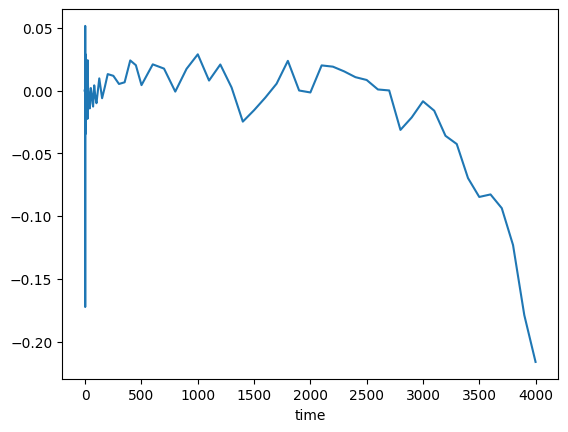

In [34]:
alfa_xr.plot()

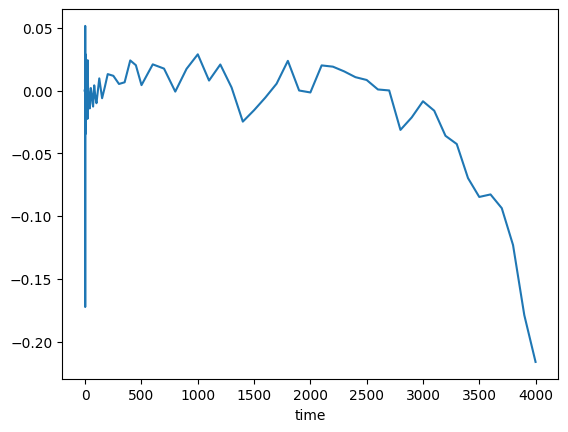

In [35]:
alfaraw_xr.plot()

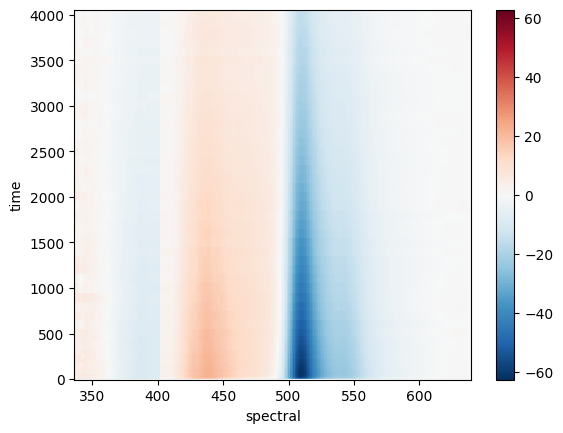

In [36]:
corrGFPppH2O=result.data["GFPppH2O"].data/(1+alfa_xr)
corrGFPppH2O.plot()

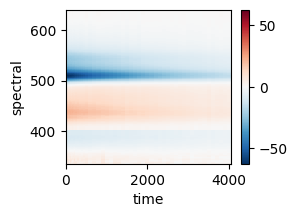

In [37]:

corrGFPppH2O.plot(x="time",y="spectral",size=2)

In [38]:
# from pyglotaran_extras import plot_data_overview

# experiment_data = {
#     "GFPppH2O": "data/GFPppH2O_PBS.ascii",
# }

# plot_data_overview(experiment_data["corrGFPppH2O"], linlog=True, linthresh=1)


(<Figure size 1500x1000 with 5 Axes>,
 (<Axes: xlabel='time', ylabel='spectral'>,
  <Axes: title={'center': 'data. LSV'}, xlabel='time', ylabel='data_left_singular_vectors'>,
  <Axes: title={'center': 'data. log(SV)'}, xlabel='singular_value_index', ylabel='data_singular_values'>,
  <Axes: title={'center': 'data. RSV'}, xlabel='spectral', ylabel='data_right_singular_vectors'>))

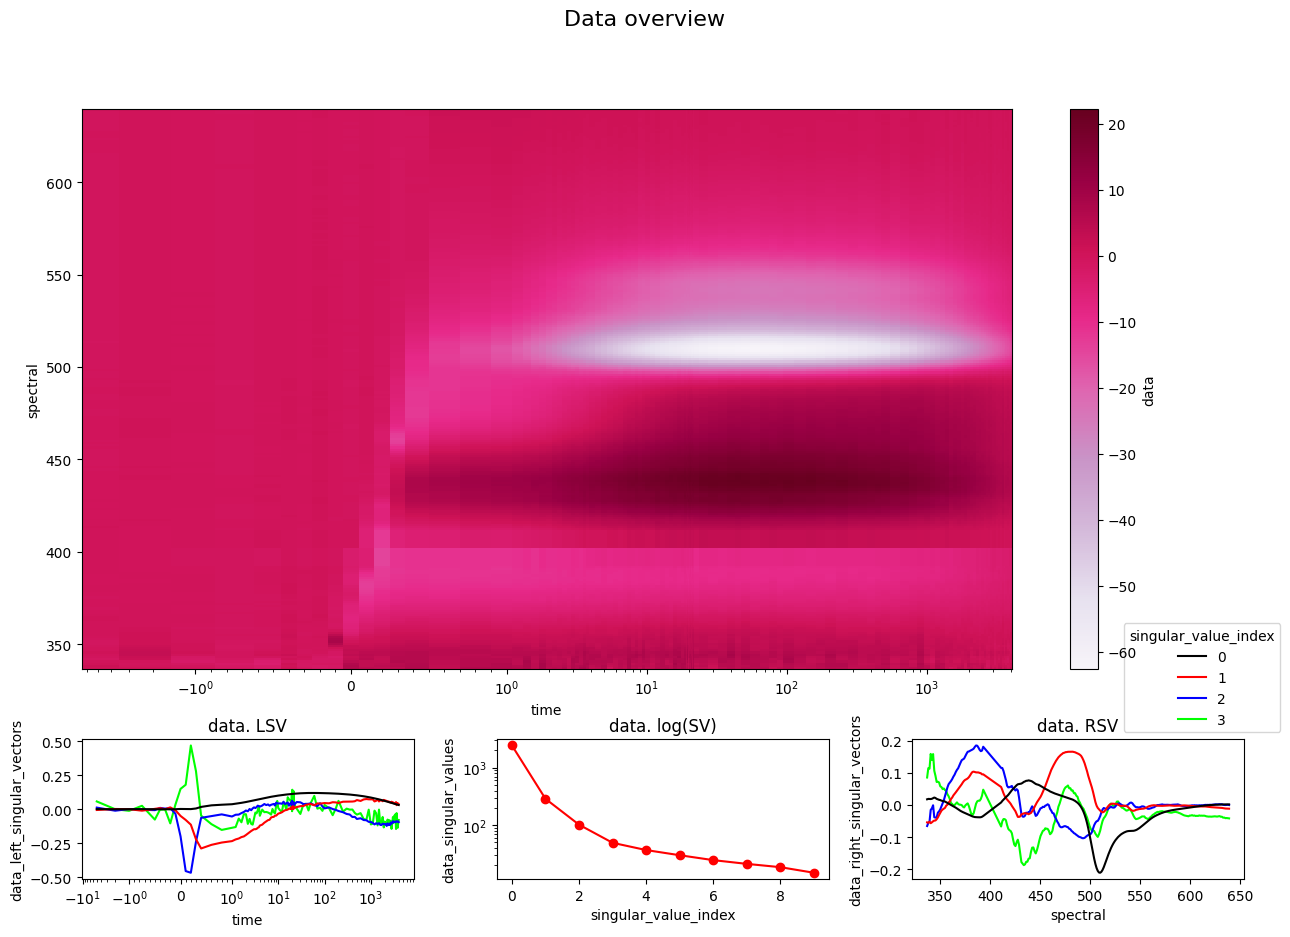

In [39]:
from glotaran.io import save_dataset, save_result
save_dataset(corrGFPppH2O,"data/corrGFPppH2O.ascii",allow_overwrite=True)
experiment_data = {
    "GFPppH2O": "data/corrGFPppH2O.ascii",
}

plot_data_overview(experiment_data["GFPppH2O"], linlog=True, linthresh=1)

In [40]:
# corrGFPppH2O.to_dataset(name="data").to_netcdf("data/corrGFPppH2O.nc")
# experiment_data = {
#     "GFPppH2O": "data/corrGFPppH2O.nc",
# }

# plot_data_overview(experiment_data["GFPppH2O"], linlog=True, linthresh=1)

In [41]:
from glotaran.optimization.optimize import optimize
from glotaran.project.scheme import Scheme
# model_path = "models/model5osc.yml"
# parameters_file_path = "20230113/20230114optimized_parameters.csv"
# model_path = "models/model_sequential5osc.yml"
# parameters_file_path = "20230116/20230116optimized_parameters_seq4osc5.csv"
model_path = "models/model_sequential6osc.yml"
parameters_file_path = "20230116/20230116optimized_parameters_seq4osc6.csv"

scheme = Scheme(
    model_path,
    parameters_file_path,
    experiment_data,
    maximum_number_function_evaluations=7,
)
result = optimize(scheme)


ValueError: There is no file 'models/model_sequential6osc.yml'.

 - 8.4975e+02
 - 3.4393e+02 nev 1
 - 3.3354e+02 nev 7
 - 2.4950e+02 nev 7 free DOAS compensation, high damping rates
 - 3.0936e+02 nev 7 free DOAS, except for the fixed reverse rate
 - 2.4682e+02 nev 7 free DOAS, and free kinetic.to_S1_from_S2
 - 2.8790e+02 nev 7 free DOAS, except for the fixed reverse rate at -10, and free kinetic.to_S1_from_S2
 - 2.7408e+2 nev 7 free DOAS, except for the fixed reverse rate at -15, and free kinetic.to_S1_from_S2
 - 2.6398e+02 -20
 - 2.5723e+02 -25
 - 2.5276e+02 -30
 -  2.4686e+02 nev 7 free DOAS, and free kinetic.
 -  2.3976e+02 nev 7 five free DOAS, and free kinetic.
 -   7         3.2957e+02 seq 4 & 4 DOAS
 -   7         2.4124e+02 seq 4 & 5 DOAS
 -   7         2.3768e+02 seq 4 & 6 DOAS
 -    7        2.3686e+02 seq 4 & 6 DOAS

In [ ]:
from pyglotaran_extras import plot_overview

# fig, axes = plot_overview(result, linlog=True, linthresh=1, figure_only=False,number_of_singular_vectors_residual=1)
fig, axes = plot_overview(result, linlog=True, linthresh=1, figure_only=False)

# Add thin line at zero to SAS and DAS plots
for ax in axes[0:2, 1:3].flatten():
    ax.axhline(0, color="k", linewidth=1)

In [ ]:
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from cycler import cycler

wavelengths = [406, 445, 510, 601]
fig3tr, axes = plot_fitted_traces(
    result,
    wavelengths,
    axes_shape=(2, 2),
    linlog=True,
    linthresh=0.3,
    cycler=cycler(color=["r", "k"]), # change plot colors
    figsize=(10, 5),
)

# Add thin line at zero to all plots
for ax in axes.flatten():
    ax.axhline(0, color="k", linewidth=1)

In [ ]:
result.optimized_parameters

Note that DOAS #3,4 have decay rates larger than 50, and most likely belong to the CA.
 #1,5 with decay rates of 26,16 are in between, and #2 and 6 with  decay rates of 9.6 and 2.6 are the longer lived damped oscillations.

In [ ]:
result

In [ ]:
save_result(
        result=result,
        result_path="20230130/refinedresult.yaml",
        allow_overwrite=True,
    )

# Plot coherent artifact


In [ ]:
from pyglotaran_extras import plot_coherent_artifact

irfas_plot_wavelength = 550

plot_coherent_artifact(
    result.data["GFPppH2O"], time_range=(-0.1,0.1), spectral=irfas_plot_wavelength,
)

In [ ]:
from pyglotaran_extras import plot_doas
fig, axes = plot_doas(
    result,
    damped_oscillation=["osc1", "osc2", "osc5", "osc6"],
    time_range=(-0.1, 0.8),
    spectral=550,figsize=(10, 3),
    # oscillation_type="sin"
    # normalize=False
)

for vline_pos in [415,460]:
    axes[1].axvline(vline_pos, color="r", linewidth=1)
    axes[2].axvline(vline_pos, color="r", linewidth=1)
for vline_pos in [526]:
    axes[1].axvline(vline_pos, color="g", linewidth=1)
    axes[2].axvline(vline_pos, color="g", linewidth=1)
for vline_pos in [393,429,479]:
    axes[1].axvline(vline_pos, color="b", linewidth=1)
    axes[2].axvline(vline_pos, color="b", linewidth=1)
axes[0].set_xlabel("Time (ps)")
axes[0].axhline(0, color="k", linewidth=1)
axes[0].get_legend().remove()
axes[1].set_xlabel("Wavelength (nm)")
axes[2].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("")
axes[1].set_title("DOAS")
axes[0].annotate("A", xy=(0.01, 0.89), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(0.01, 0.89), xycoords="axes fraction",fontsize=16)
axes[2].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction",fontsize=16)



In [ ]:
result.data["GFPppH2O"].damped_oscillation_frequency

In [ ]:
result.data["GFPppH2O"].damped_oscillation_rate

In [ ]:

matrix = result.data["GFPppH2O"].matrix
clp = result.data["GFPppH2O"].clp


ca_labels = []
ca_doas_labels = []
doas_labels = []
non_doas_labels = []


for clp_label in matrix.clp_label:
    if clp_label.item().startswith(("coherent_artifact_")):
        ca_labels.append(clp_label.item())
    elif clp_label.item().startswith(("osc5_","osc4_","osc3_","osc1_")):
    # elif clp_label.item().startswith(("osc4_","osc3_")):
        ca_doas_labels.append(clp_label.item())
    elif clp_label.item().endswith(("_sin","_cos")):
        doas_labels.append(clp_label.item())
    else:
        non_doas_labels.append(clp_label.item())

print(f"{doas_labels=}")
print(f"{ca_labels=}")
print(f"{ca_doas_labels=}")
print(f"{non_doas_labels=}")
# matrix.clp_label

In [ ]:
from pyglotaran_extras.plotting.utils import add_cycler_if_not_none
from pyglotaran_extras.plotting.utils import extract_irf_location
from pyglotaran_extras.plotting.utils import shift_time_axis_by_irf_location

data_dict = {
    "data": result.data["GFPppH2O"].data,
    "fitted_data": result.data["GFPppH2O"].fitted_data,
    # "sum": (matrix * clp).sum(dim="clp_label"),
}

for non_doas_label in non_doas_labels:
    data_dict[non_doas_label] = (
        matrix.sel(clp_label=non_doas_label) * clp.sel(clp_label=non_doas_label)
    ).drop("clp_label")

data_dict["doas"] = (
    (matrix.sel(clp_label=doas_labels) - 1) * clp.sel(clp_label=doas_labels)
).sum(dim="clp_label")

data_dict["CA"] = (matrix.sel(clp_label=ca_labels) * clp.sel(clp_label=ca_labels)).sum(
    dim="clp_label"
) + (
    (matrix.sel(clp_label=ca_doas_labels) - 1) * clp.sel(clp_label=ca_doas_labels)
).sum(
    dim="clp_label"
)

data = xr.Dataset(data_dict)

plot_dim = (2, 2)

# fig, axes = plt.subplots(*plot_dim, figsize=(21, 14))
fig, axes = plt.subplots(*plot_dim, figsize=(14, 8))
for ax in axes.flatten():
    add_cycler_if_not_none(ax, PlotStyle().cycler)
    ax.set_xscale("symlog", linthresh=0.3, linscale=1)

wls = np.linspace(
    result.data["GFPppH2O"].spectral.min().item(),
    result.data["GFPppH2O"].spectral.max().item(),
    num=np.prod(plot_dim),
)
wls=[406, 445, 510, 601]
# for ax, wl in zip(axes.flatten(), wls):
#     for key in data.data_vars.keys():
#         data[key].sel(spectral=wl, method="nearest").plot(x="time", ax=ax, label=key)
#         ax.set_xscale("symlog", linthresh=0.3)

for ax, wl in zip(axes.flatten(), wls):
    for key in data.data_vars.keys():
        # Shift by IRF
        irf_location = extract_irf_location(result.data["GFPppH2O"], wl)
        shift_time_axis_by_irf_location(
            data[key].sel(spectral=wl, method="nearest"), irf_location=irf_location
        ).plot(x="time", ax=ax, label=key)
axes[0][0].legend()
axes[0][0].legend()

fig.tight_layout()

### TODO shift the time axes!

### Refining the kinetic model

In [ ]:
from glotaran.io import save_dataset, save_result
save_result(
        result=result,
        result_path="20230131/refined_result.yaml",
        allow_overwrite=True,
    )

Because the red SADS above still contains stimulated emission around 430 nm, a relaxed S2 is introduced, which is populated by 40% of the decaying S2, whereas 60% of S2 converts to S1. With some educated guesses, with the help of spectral constraints, and after some trial and error, reasonable starting values for the additional rate constants have been found. The thus estimated SADS can be interpreted.

In [ ]:
from glotaran.optimization.optimize import optimize
from glotaran.project.scheme import Scheme
# model_path = "models/model5osc.yml"
# parameters_file_path = "20230113/20230114optimized_parameters.csv"
# model_path = "models/model_sequential5osc.yml"
# parameters_file_path = "20230116/20230116optimized_parameters_seq4osc5.csv"
experiment_data = {
    "GFPppH2O": "data/corrGFPppH2O.ascii",
}
model_path = "models/model_refined6osc.yml"
parameters_file_path = "20230131/optimized_parameters_6osc_target.csv"

scheme = Scheme(
    model_path,
    parameters_file_path,
    experiment_data,
    maximum_number_function_evaluations=1,
)
result = optimize(scheme)


In [ ]:
result.data["GFPppH2O"].lifetime_decay

In [ ]:
result

In [ ]:
from pyglotaran_extras.plotting.plot_concentrations import plot_concentrations
from pyglotaran_extras.plotting.plot_spectra import plot_sas
import matplotlib.pyplot as plt


def plot_concentration_and_spectra(result_dataset):
    # fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    plot_concentrations(result_dataset,axes[0], center_λ=0, linlog=True)
    plot_sas(result_dataset,axes[1])
    return fig, axes

fig, axes = plot_concentration_and_spectra(result.data["GFPppH2O"])
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("SADS (mOD)")
axes[1].set_title("SADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction",fontsize=16)


In [ ]:
from glotaran.io import save_dataset, save_result
save_result(
        result=result,
        result_path="20230131t/target_refined_result.yaml",
        allow_overwrite=True,
    )

Note that after permutation, DOAS #5,6 have decay rates larger than 50, and most likely belong to the CA.
 #1,5 with decay rates of 16,26 are in between, and #2 and 1 with  decay rates of 9.6 and 2.6 are the longer lived damped oscillations.
We will now plot the decomposition 

In [ ]:

matrix = result.data["GFPppH2O"].matrix
clp = result.data["GFPppH2O"].clp


ca_labels = []
ca_doas_labels = []
doas_labels = []
non_doas_labels = []


for clp_label in matrix.clp_label:
    if clp_label.item().startswith(("coherent_artifact_")):
        ca_labels.append(clp_label.item())
    elif clp_label.item().startswith(("osc5_","osc6_")):
    # elif clp_label.item().startswith(("osc4_","osc3_","osc6_")):
        ca_doas_labels.append(clp_label.item())
    elif clp_label.item().endswith(("_sin","_cos")):
        doas_labels.append(clp_label.item())
    else:
        non_doas_labels.append(clp_label.item())

print(f"{doas_labels=}")
print(f"{ca_labels=}")
print(f"{ca_doas_labels=}")
print(f"{non_doas_labels=}")
# matrix.clp_label

In [ ]:
data_dict = {
    "data": result.data["GFPppH2O"].data,
    "fitted_data": result.data["GFPppH2O"].fitted_data,
    # "sum": (matrix * clp).sum(dim="clp_label"),
}

for non_doas_label in non_doas_labels:
    data_dict[non_doas_label] = (
        matrix.sel(clp_label=non_doas_label) * clp.sel(clp_label=non_doas_label)
    ).drop("clp_label")

data_dict["doas"] = (
    (matrix.sel(clp_label=doas_labels) - 1) * clp.sel(clp_label=doas_labels)
).sum(dim="clp_label")

data_dict["CA"] = (matrix.sel(clp_label=ca_labels) * clp.sel(clp_label=ca_labels)).sum(
    dim="clp_label"
) + (
    (matrix.sel(clp_label=ca_doas_labels) - 1) * clp.sel(clp_label=ca_doas_labels)
).sum(
    dim="clp_label"
)

data = xr.Dataset(data_dict)

plot_dim = (2, 2)

# fig, axes = plt.subplots(*plot_dim, figsize=(21, 14))
fig, axes = plt.subplots(*plot_dim, figsize=(14, 8))

wls = np.linspace(
    result.data["GFPppH2O"].spectral.min().item(),
    result.data["GFPppH2O"].spectral.max().item(),
    num=np.prod(plot_dim),
)
wls=[406, 445, 510, 601]
for ax, wl in zip(axes.flatten(), wls):
    for key in data.data_vars.keys():
        data[key].sel(spectral=wl, method="nearest").plot(x="time", ax=ax, label=key)
        ax.set_xscale("symlog", linthresh=0.3)

axes[0][0].legend()

fig.tight_layout()

In [ ]:
from cycler import cycler
# fig,ax=plt.subplots(1,1)


data_dict = {
    "data": result.data["GFPppH2O"].data,
    "fitted_data": result.data["GFPppH2O"].fitted_data,
    # "sum": (matrix * clp).sum(dim="clp_label"),
}

for non_doas_label in non_doas_labels:
    data_dict[non_doas_label] = (
        matrix.sel(clp_label=non_doas_label) * clp.sel(clp_label=non_doas_label)
    ).drop("clp_label")

data_dict["doas"] = (
    (matrix.sel(clp_label=doas_labels) - 1) * clp.sel(clp_label=doas_labels)
).sum(dim="clp_label")

data_dict["CA"] = (matrix.sel(clp_label=ca_labels) * clp.sel(clp_label=ca_labels)).sum(
    dim="clp_label"
) + (
    (matrix.sel(clp_label=ca_doas_labels) - 1) * clp.sel(clp_label=ca_doas_labels)
).sum(
    dim="clp_label"
)

data = xr.Dataset(data_dict)

plot_dim = (1,1)
myFRLcolors=['tab:orange','tab:grey','k', 'r','b','g','m','c','y', 'tab:brown', 'tab:purple']
custom_cycler=cycler(color=myFRLcolors)
# fig, axes = plt.subplots(*plot_dim, figsize=(21, 14))
fig, ax = plt.subplots(*plot_dim, figsize=(8, 4))
#
wl=510
ax.set_prop_cycle(custom_cycler)
for key in data.data_vars.keys():
        # Shift by IRF
    irf_location = extract_irf_location(result.data["GFPppH2O"], wl)
    shift_time_axis_by_irf_location(
        data[key].sel(spectral=wl, method="nearest"), irf_location=irf_location
    ).plot(x="time", ax=ax, label=key)
    ax.set_xscale("symlog", linthresh=0.3)



# for ax, wl in zip(axes.flatten(), wls):
#     for key in data.data_vars.keys():
#         data[key].sel(spectral=wl, method="nearest").plot(x="time", ax=ax, label=key)

ax.legend(bbox_to_anchor=(0.02,0.95), loc='upper left')
ax.set_xlabel("Time (ps)")
ax.set_ylabel("ΔA(mOD)")


fig.tight_layout()

In [ ]:
from cycler import cycler
# fig,ax=plt.subplots(1,1)


data_dict = {
    "data": result.data["GFPppH2O"].data,
    "fitted_data": result.data["GFPppH2O"].fitted_data,
    # "sum": (matrix * clp).sum(dim="clp_label"),
}

for non_doas_label in non_doas_labels:
    data_dict[non_doas_label] = (
        matrix.sel(clp_label=non_doas_label) * clp.sel(clp_label=non_doas_label)
    ).drop("clp_label")

data_dict["doas"] = (
    (matrix.sel(clp_label=doas_labels) - 1) * clp.sel(clp_label=doas_labels)
).sum(dim="clp_label")

data_dict["CA"] = (matrix.sel(clp_label=ca_labels) * clp.sel(clp_label=ca_labels)).sum(
    dim="clp_label"
) + (
    (matrix.sel(clp_label=ca_doas_labels) - 1) * clp.sel(clp_label=ca_doas_labels)
).sum(
    dim="clp_label"
)

data = xr.Dataset(data_dict)

plot_dim = (2,2)
myFRLcolors=['tab:orange','tab:grey','k', 'r','b','g','m','c','y', 'tab:brown', 'tab:purple']
custom_cycler=cycler(color=myFRLcolors)
# fig, axes = plt.subplots(*plot_dim, figsize=(21, 14))
fig, axes = plt.subplots(*plot_dim, figsize=(12, 6))
#
wls=[ 406,450,510,640 ]
axes[0][0].set_prop_cycle(custom_cycler)
axes[0][1].set_prop_cycle(custom_cycler)
axes[1][0].set_prop_cycle(custom_cycler)
axes[1][1].set_prop_cycle(custom_cycler)
for ax, wl in zip(axes.flatten(), wls):
    for key in data.data_vars.keys():
        # Shift by IRF
        irf_location = extract_irf_location(result.data["GFPppH2O"], wl)
        shift_time_axis_by_irf_location(
            data[key].sel(spectral=wl, method="nearest"), irf_location=irf_location
        ).plot(x="time", ax=ax, label=key)
        ax.set_xscale("symlog", linthresh=0.3)



# for ax, wl in zip(axes.flatten(), wls):
#     for key in data.data_vars.keys():
#         data[key].sel(spectral=wl, method="nearest").plot(x="time", ax=ax, label=key)

axes[0][0].legend(bbox_to_anchor=(0.02,0.95), loc='upper left')
axes[0][0].set_xlabel("Time (ps)")
axes[0][0].set_ylabel("(mOD)")


fig.tight_layout()

In [ ]:
from pyglotaran_extras.plotting.plot_residual import plot_residual
from pyglotaran_extras.plotting.plot_svd import plot_lsv_residual,plot_rsv_residual

def plot_residual_and_svd(result_dataset):
    fig, axes = plt.subplots(1, 3, figsize=(10, 2))
    plot_residual(result_dataset,axes[0])
    axes[0].get_legend().remove()
    axes[0].set_ylabel("Wavelength (nm)")
    plot_lsv_residual(result_dataset,axes[1], indices=[0])
    axes[1].get_legend().remove()
    axes[1].set_ylabel("")
    axes[1].set_title("residual 1st LSV")
    plot_rsv_residual(result_dataset,axes[2], indices=[0])
    axes[2].set_xlabel("Wavelength (nm)")
    axes[2].set_title("residual 1st RSV")
    axes[2].get_legend().remove()
    axes[2].set_ylabel("")

    return fig, axes

fig, axes = plot_residual_and_svd(result.data["GFPppH2O"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction",fontsize=16)

In [ ]:
from pyglotaran_extras import plot_doas
fig, axes = plot_doas(
    result,
    damped_oscillation=["osc1", "osc2", "osc3", "osc4"],
    time_range=(-0.1, 0.6),
    spectral=550,figsize=(10, 3),normalize =False
    # oscillation_type="sin"
    # normalize=False
    # ,center_λ=550
    # spectral=700,
)

# for vline_pos in [412,450]:
#     axes[1].axvline(vline_pos, color="k", linewidth=1)
#     axes[2].axvline(vline_pos, color="k", linewidth=1)
for vline_pos in [415,460]:
    axes[1].axvline(vline_pos, color="r", linewidth=1)
    axes[2].axvline(vline_pos, color="r", linewidth=1)
for vline_pos in [526]:
    axes[1].axvline(vline_pos, color="g", linewidth=1)
    axes[2].axvline(vline_pos, color="g", linewidth=1)
for vline_pos in [393,429,479]:
    axes[1].axvline(vline_pos, color="b", linewidth=1)
    axes[2].axvline(vline_pos, color="b", linewidth=1)
axes[0].set_xlabel("Time (ps)")
axes[0].axhline(0, color="k", linewidth=1)
axes[0].get_legend().remove()
axes[1].set_xlabel("Wavelength (nm)")
axes[2].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("")
axes[1].set_title("DOAS")
axes[0].annotate("A", xy=(0.01, 0.89), xycoords="axes fraction",fontsize=16)
axes[1].annotate("B", xy=(0.0, 0.89), xycoords="axes fraction",fontsize=16)
axes[2].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction",fontsize=16)


In [ ]:
result.optimized_parameters

## DOAS related data variables

damped_oscillation_associated_spectra

damped_oscillation_phase

damped_oscillation_sin

damped_oscillation_cos


In [ ]:
# set plot size
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### damped_oscillation_phase


In [ ]:
result.data["GFPppH2O"]["damped_oscillation_phase"].plot.line(x="spectral")

### Plot a subset


In [ ]:
# slice the first 5 damped oscillations
# result.data["GFPppH2O"]["damped_oscillation_phase"].isel(
#     damped_oscillation=slice(0, 5)
# ).plot.line(x="spectral", ylim=(-8, 10));


In [ ]:
# or select by name
# result.data["GFPppH2O"]["damped_oscillation_phase"].sel(
#     damped_oscillation=["osc8", "osc9",
#     ]
# ).plot.line(x="spectral", ylim=(-8, 10));


### damped_oscillation_associated_spectra


In [ ]:
result.data["GFPppH2O"]["damped_oscillation_associated_spectra"].plot.line(x="spectral")

In [ ]:
result.data["GFPppH2O"]["damped_oscillation_associated_spectra"].sel(
    damped_oscillation=["osc1", "osc2", "osc3"]
).plot.line(x="spectral")

Scaling: Multiply maxima of time and spectral


In [ ]:
result.data["GFPppH2O"]["damped_oscillation_cos"].sel(
    spectral=550, method="nearest"
).sel(damped_oscillation=["osc1", "osc2", "osc3"], time=slice(0, 1.6)).plot.line(x="time")

In [ ]:
result.data["GFPppH2O"]["damped_oscillation_sin"].isel(time=slice(0, 200)).sel(
    spectral=550, method="nearest"
).plot.line(x="time")

In [ ]:
result.data["GFPppH2O"]["damped_oscillation_cos"].isel(time=slice(30, 350)).isel(
    damped_oscillation=slice(0, 4)
).sel(spectral=550, method="nearest").sel(
    # damped_oscillation=["osc2", "osc18"]
    damped_oscillation=["osc1"]
).plot.line(
    x="time"
)

In [ ]:
result.data["GFPppH2O"]["damped_oscillation_sin"].isel(time=slice(30, 500)).sel(
    damped_oscillation="osc3"
).plot(center=False)

In [ ]:
result.data["GFPppH2O"]["damped_oscillation_cos"].isel(time=slice(120, 300)).sel(
    damped_oscillation=["osc1", "osc2", "osc3"]
).sel(spectral=550, method="nearest").plot.line(x="time")
result.data["GFPppH2O"]["damped_oscillation_sin"].isel(time=slice(120, 300)).sel(
    damped_oscillation=["osc1", "osc2", "osc3"]
).sel(spectral=550, method="nearest").plot.line(x="time")

# Interactive Plots

_Uncomment the code in the cell below if `ipywidgets` are not installed_

In [ ]:
# !pip install ipywidgets

In [ ]:
from __future__ import annotations

from ipywidgets import interact, widgets
import numpy as np


In [ ]:
dataset = result.data["GFPppH2O"]["damped_oscillation_cos"]

time_slider = widgets.FloatRangeSlider(
    value=[-0.1, 0.5],
    min=dataset.time.min(),
    max=2,
    step=0.01,
    description="time:",
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
    layout=widgets.Layout(width="50%"),
)
spectral_slider = widgets.FloatSlider(
    value=500,
    min=dataset.spectral.min(),
    max=dataset.spectral.max(),
    step=0.1,
    description="spectral:",
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
    layout=widgets.Layout(width="50%"),
)


In [ ]:
doas_select = widgets.SelectMultiple(
    options=list(dataset.damped_oscillation.values),
    value=list(dataset.damped_oscillation.values[:5]),
    # rows=10,
    description="DOAS",
    layout=widgets.Layout(
        height=f"{1.2*len(list(dataset.damped_oscillation.values))}em"
    ),
)


In [ ]:
def plot_func_factory(dataset: xr.DataArray):
    time = dataset.time

    def wrapper(spectral: float, time_range: tuple[float, float], doas: list[str]):
        time_mask = np.logical_and(time >= time_range[0], time <= time_range[1])
        doas_mask = np.isin(dataset.damped_oscillation, doas)
        dataset.isel(time=time_mask, damped_oscillation=doas_mask).sel(
            spectral=spectral, method="nearest"
        ).plot.line(x="time")
        plt.show()

    return wrapper


plot_cos = plot_func_factory(result.data["GFPppH2O"]["damped_oscillation_cos"])

interact(plot_cos, spectral=spectral_slider, time_range=time_slider, doas=doas_select)
